# Get the data

In [60]:
import pandas as pd
train_set=pd.read_csv('anotherdataset/train.csv')
test_set=pd.read_csv('anotherdataset/test.csv')

In [61]:
#快速查看数据结构
train_set.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# 探索性数据分析

In [62]:
import matplotlib.pyplot as plt
train_set.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

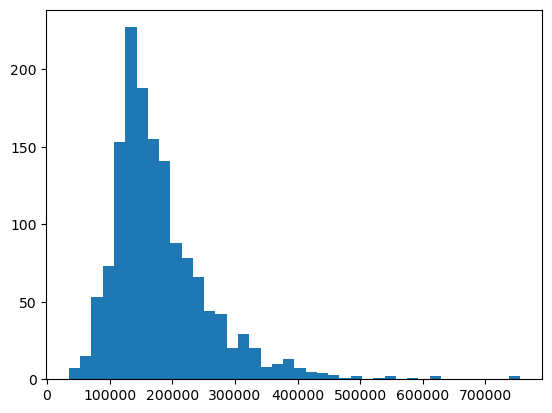

In [63]:
#价格分布
SalePrice=train_set['SalePrice'].values
plt.hist(SalePrice, bins=40)
plt.show()

In [64]:
#查看训练数据属性
train_set.dtypes.value_counts()

object     43
int64      35
float64     3
Name: count, dtype: int64

In [65]:
#把训练集分成数值类型和类别类型
train_set_cat = train_set.select_dtypes(include='object')
train_set_cat['SalePrice'] = train_set['SalePrice']
train_set_num = train_set.select_dtypes(include='number')
train_set_num['SalePrice'] = train_set['SalePrice']

In [66]:
#方差分析
from scipy.stats import f_oneway
def ANOVA(df, feature):
    category_groups = df.groupby(feature)['SalePrice'].apply(list)
    return f_oneway(*category_groups)

In [67]:
p_vals = {}
for col in train_set_cat.columns:
    p_vals[col] = ANOVA(train_set_cat, col).statistic
p_vals.pop('SalePrice')

d:\Anaconda\lib\site-packages\scipy\stats\stats.py:3650: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())


inf

In [68]:
#最先查看前十个影响因子，后面选取不同的数量比较了一下训练效果，最后选取了30个
cat_features=sorted(p_vals, key=p_vals.get, reverse=True)[:30]

In [69]:
#皮尔逊相关系数
corr = train_set_num.corr(method='pearson')
corr = corr.SalePrice.apply(abs).to_dict()
corr.pop('SalePrice')
num_fetures=sorted(corr, key=corr.get, reverse=True)[:30]

In [70]:
features = cat_features+num_fetures
train_set[features].head(5)

,ExterQual,KitchenQual,BsmtQual,GarageFinish,Foundation,CentralAir,HeatingQC,Neighborhood,GarageType,BsmtExposure,...,BsmtFullBath,BsmtUnfSF,BedroomAbvGr,KitchenAbvGr,EnclosedPorch,ScreenPorch,PoolArea,MSSubClass,OverallCond,MoSold
0,Gd,Gd,Gd,RFn,PConc,Y,Ex,CollgCr,Attchd,No,...,1,150,3,1,0,0,0,60,5,2
1,TA,TA,Gd,RFn,CBlock,Y,Ex,Veenker,Attchd,Gd,...,0,284,3,1,0,0,0,20,8,5
2,Gd,Gd,Gd,RFn,PConc,Y,Ex,CollgCr,Attchd,Mn,...,1,434,3,1,0,0,0,60,5,9
3,TA,Gd,TA,Unf,BrkTil,Y,Gd,Crawfor,Detchd,No,...,1,540,3,1,272,0,0,70,5,2
4,Gd,Gd,Gd,RFn,PConc,Y,Ex,NoRidge,Attchd,Av,...,1,490,4,1,0,0,0,60,5,12


# 数据预处理

In [71]:
from sklearn.model_selection import  train_test_split
X = train_set[features].loc[:, train_set[features].columns != "SalePrice"]
y = train_set['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [72]:
#标准化数据
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
normalizedVars = scaler.fit_transform(X_train[num_fetures])
normalizedVars_df = pd.DataFrame(normalizedVars, columns=scaler.get_feature_names_out())
normalizedVars_df=normalizedVars_df.fillna(0)
normalizedVars_df.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,...,BsmtFullBath,BsmtUnfSF,BedroomAbvGr,KitchenAbvGr,EnclosedPorch,ScreenPorch,PoolArea,MSSubClass,OverallCond,MoSold
0,0.637073,-0.051643,0.293831,-0.192617,0.642893,0.862092,0.772872,0.268177,1.107889,1.020374,...,-0.813995,1.711873,-1.112669,-0.207743,-0.344584,-0.280154,-0.073333,1.475911,-0.515364,-0.508139
1,-0.094926,-0.421692,0.293831,0.030695,-0.046799,0.357895,-1.062909,-0.963076,0.094543,0.682585,...,1.119464,-1.279161,0.128036,-0.207743,-0.344584,-0.280154,15.000378,-0.871228,0.390453,-2.000860
2,-0.094926,-0.518474,-1.069494,-0.938576,-1.128667,-1.221922,-1.062909,-0.347450,-1.049557,-1.681937,...,-0.813995,-0.478553,-1.112669,-0.207743,-0.344584,-0.280154,-0.073333,-0.167086,-0.515364,1.357763
3,-0.826925,-0.207253,-1.069494,-0.910068,-0.186540,0.650071,-1.062909,-0.347450,-0.363097,-0.330782,...,-0.813995,0.920261,0.128036,-0.207743,0.242811,-0.280154,-0.073333,-0.871228,-0.515364,0.611402
4,-0.094926,-0.169300,-1.069494,-0.838798,0.859266,0.701784,-1.062909,0.268177,-0.428474,-1.295893,...,-0.813995,0.596420,1.368742,-0.207743,4.142457,-0.280154,-0.073333,-0.871228,0.390453,-0.881319


In [73]:
#独热编码
from sklearn.preprocessing import OneHotEncoder 
enc = OneHotEncoder(handle_unknown='ignore')
categoricalVars = enc.fit_transform(X_train[cat_features]).toarray()
categoricalVars_df = pd.DataFrame(categoricalVars, columns=enc.get_feature_names_out())
categoricalVars_df=categoricalVars_df.fillna(0.0)  #在这里用0.0填充了缺失值
categoricalVars_df.head()


,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,BsmtQual_Ex,BsmtQual_Fa,...,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,GarageCond_nan,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [74]:
#合并数据
X_train_cleaned = pd.concat([categoricalVars_df, normalizedVars_df], axis='columns')
X_train_cleaned.head()

,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,BsmtQual_Ex,BsmtQual_Fa,...,BsmtFullBath,BsmtUnfSF,BedroomAbvGr,KitchenAbvGr,EnclosedPorch,ScreenPorch,PoolArea,MSSubClass,OverallCond,MoSold
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.813995,1.711873,-1.112669,-0.207743,-0.344584,-0.280154,-0.073333,1.475911,-0.515364,-0.508139
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.119464,-1.279161,0.128036,-0.207743,-0.344584,-0.280154,15.000378,-0.871228,0.390453,-2.000860
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.813995,-0.478553,-1.112669,-0.207743,-0.344584,-0.280154,-0.073333,-0.167086,-0.515364,1.357763
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.813995,0.920261,0.128036,-0.207743,0.242811,-0.280154,-0.073333,-0.871228,-0.515364,0.611402
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.813995,0.596420,1.368742,-0.207743,4.142457,-0.280154,-0.073333,-0.871228,0.390453,-0.881319


In [75]:
#按一样的步骤操作测试集
X_test_categorical = enc.transform(X_test[cat_features]).toarray()
X_test_categorical_df = pd.DataFrame(X_test_categorical, columns = enc.get_feature_names_out())
X_test_categorical_df=X_test_categorical_df.fillna(0)
X_test_normalized = scaler.transform(X_test[num_fetures])
X_test_normalized_df = pd.DataFrame(X_test_normalized, columns=scaler.get_feature_names_out())
X_test_normalized_df=X_test_normalized_df.fillna(0.0)
X_test_cleaned = pd.concat([X_test_categorical_df, X_test_normalized_df], axis='columns')
X_test_cleaned.head()

,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,BsmtQual_Ex,BsmtQual_Fa,...,BsmtFullBath,BsmtUnfSF,BedroomAbvGr,KitchenAbvGr,EnclosedPorch,ScreenPorch,PoolArea,MSSubClass,OverallCond,MoSold
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.813995,-0.388597,0.128036,-0.207743,-0.344584,-0.280154,-0.073333,-0.871228,2.202087,-1.627680
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.119464,-0.309886,0.128036,-0.207743,-0.344584,-0.280154,-0.073333,0.067628,-0.515364,-0.881319
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.813995,0.987728,-1.112669,-0.207743,1.776563,-0.280154,-0.073333,-0.636514,0.390453,-1.254499
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.813995,0.081422,0.128036,-0.207743,0.242811,-0.280154,-0.073333,-0.167086,1.296270,1.357763
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.119464,0.065680,-1.112669,-0.207743,-0.344584,-0.280154,-0.073333,-0.871228,-0.515364,0.984583


# 模型训练

In [76]:
#使用线性回归但是效果并不好
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_train_cleaned, y_train)
y_pred_train = lin_reg.predict(X_train_cleaned)
y_pred_test = lin_reg.predict(X_test_cleaned)
print('Train RMSE:', mean_squared_error(y_train, y_pred_train, squared=False))
print('Test RMSE:', mean_squared_error(y_test, y_pred_test, squared=False))


Train RMSE: 25651.792624444177
Test RMSE: 1.4910694240727272e+16


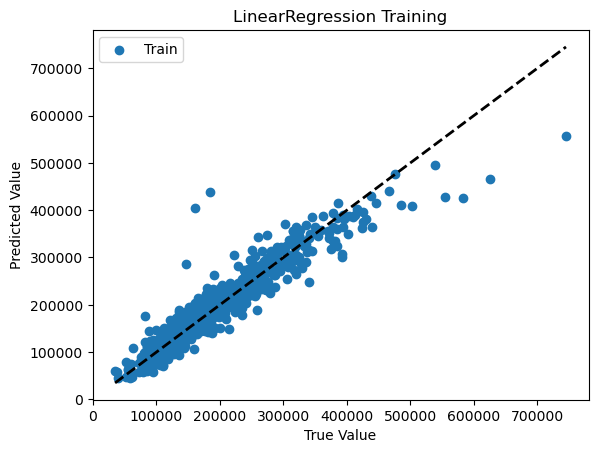

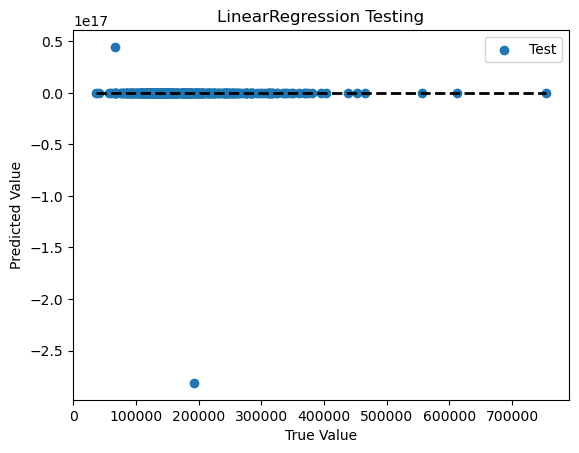

In [77]:
#训练结果可视化
# 绘制训练集的预测值与真实值关系  
plt.scatter(y_train, y_pred_train, label='Train')  
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)  
plt.xlabel('True Value')  
plt.ylabel('Predicted Value')  
plt.title('LinearRegression Training')  
plt.legend()  
plt.show()  
  
# 绘制测试集的预测值与真实值关系  
plt.scatter(y_test, y_pred_test, label='Test')  
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  
plt.xlabel('True Value')  
plt.ylabel('Predicted Value')  
plt.title('LinearRegression Testing')  
plt.legend()  
plt.show()

In [78]:
#选用SGDRegressor效果好了很多
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
import numpy as np
sgd = SGDRegressor(loss="squared_error", fit_intercept=True, learning_rate='invscaling', eta0=0.01)  
train_rmse_list=[]
test_rmse_list=[]
best_train_rmse = np.inf  # 初始化最佳RMSE为无穷大 
best_test_rmse=np.inf 
best_model = None  # 初始化最佳模型为None 
for epoch in range(100):  # 假设我们训练100个epoch  
    sgd.fit(X_train_cleaned, y_train)
    y_pred_train = sgd.predict(X_train_cleaned)
    y_pred_test = sgd.predict(X_test_cleaned)
    train_rmse=mean_squared_error(y_train, y_pred_train, squared=False)
    test_rmse=mean_squared_error(y_test, y_pred_test, squared=False)
    train_rmse_list.append(train_rmse)  
    test_rmse_list.append(test_rmse) 
     # 检查当前轮次的RMSE是否小于之前最好的RMSE  
    if train_rmse < best_train_rmse:  
        best_train_rmse = train_rmse 
        best_model = sgd  # 更新最佳模型  
    if test_rmse < best_test_rmse:  
        best_test_rmse = train_rmse 
# 输出最佳RMSE和最佳模型  
print("Best train RMSE:", best_train_rmse)  
print("Best test RMSE:", best_test_rmse)  

#由此指标可以看出模型具有较好的泛化能力

Best train RMSE: 26807.30136246571
Best test RMSE: 27610.39297834998


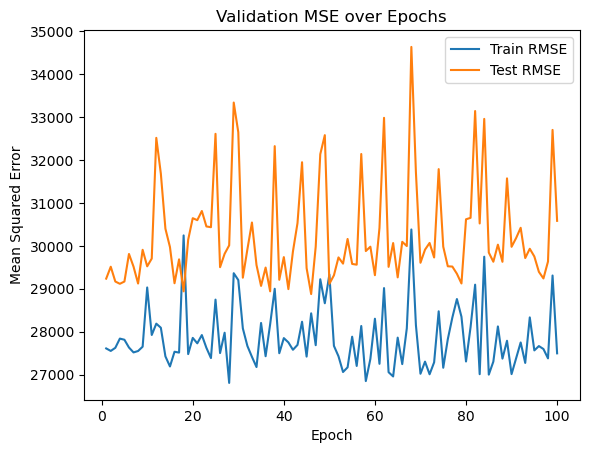

In [79]:
#训练过程可视化
# 初始化图形  
fig, ax = plt.subplots()  
# 在同一张图上绘制训练集和测试集的RMSE  
ax.plot(range(1, 101), train_rmse_list, label='Train RMSE')  
ax.plot(range(1, 101), test_rmse_list, label='Test RMSE')    
# 设置图形的标题和X、Y轴标签  
ax.set_title('Validation MSE over Epochs')  
ax.set_xlabel('Epoch')  
ax.set_ylabel('Mean Squared Error')  
# 显示图例  
ax.legend()  
# 显示图形  
plt.show()



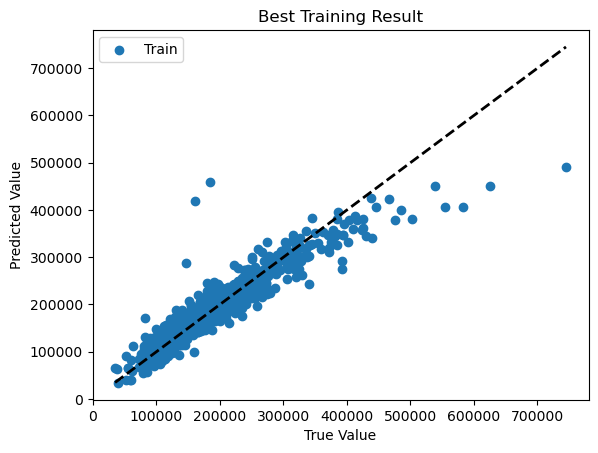

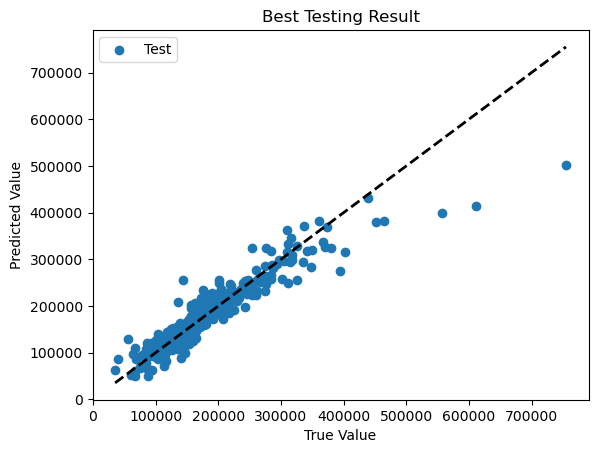

In [80]:
#最佳训练结果可视化
y_pred_train = sgd.predict(X_train_cleaned)
y_pred_test = sgd.predict(X_test_cleaned)
# 绘制训练集的预测值与真实值关系  
plt.scatter(y_train, y_pred_train, label='Train')  
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)  
plt.xlabel('True Value')  
plt.ylabel('Predicted Value')  
plt.title('Best Training Result')  
plt.legend()  
plt.show()  
  
# 绘制测试集的预测值与真实值关系  
plt.scatter(y_test, y_pred_test, label='Test')  
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  
plt.xlabel('True Value')  
plt.ylabel('Predicted Value')  
plt.title('Best Testing Result')  
plt.legend()  
plt.show()

# 研究选取不同的训练集对训练结果的影响


In [81]:
# 经过对43个类别型和38个数值型数据组合的训练结果的考察，我猜想训练结果和两者的组合方式存在一定联系。我想要通过枚举法找到使训练结果最佳的组合方式。但是最后并没有成功

# from mpl_toolkits.mplot3d import Axes3D  
# import matplotlib.pyplot as plt 
# import numpy as np
# min_train_rmse = float('inf')
# best_x, best_y = None, None
# Z=[]
# for x in range(1,39):
#   normalizedVars_df= normalizedVars_df.iloc[:, :x]
#   X_test_normalized_df=X_test_normalized_df.iloc[:,:x]
#   for y in range(1,44):
#       categoricalVars_df=categoricalVars_df.iloc[:, :y] 
#       X_test_categorical_df=X_test_categorical_df.iloc[:, :y] 
#       X_train_cleaned = pd.concat([categoricalVars_df, normalizedVars_df], axis='columns')
#       X_test_cleaned = pd.concat([X_test_categorical_df, X_test_normalized_df], axis='columns')
#       y_pred_train = sgd.predict(X_train_cleaned)
#       y_pred_test = sgd.predict(X_test_cleaned)
#       TestRMSE=mean_squared_error(y_test, y_pred_test, squared=False)
#       trainRMSE=mean_squared_error(y_train,y_pred_train)
#       Z.append(trainRMSE)
#        # Check if the current TestRMSE is smaller than the minimum recorded TestRMSE
#       if trainRMSE < min_test_rmse:
#             min_test_rmse = TestRMSE
#             best_x, best_y = x, y




In [82]:
# 使用决策树模型
from sklearn.tree import DecisionTreeRegressor  
from sklearn.metrics import mean_squared_error  
  
tree_reg = DecisionTreeRegressor(random_state=42)  
tree_reg.fit(X_train_cleaned, y_train)  
y_pred_train = tree_reg.predict(X_train_cleaned)  
y_pred_test = tree_reg.predict(X_test_cleaned)  
print('Train RMSE:', mean_squared_error(y_train, y_pred_train, squared=False))  
print('Test RMSE:', mean_squared_error(y_test, y_pred_test, squared=False))

Train RMSE: 0.0
Test RMSE: 38705.01309741715


In [83]:
#使用随机森林
from sklearn.ensemble import RandomForestRegressor  
from sklearn.metrics import mean_squared_error  
  
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)  
rf_reg.fit(X_train_cleaned, y_train)  
y_pred_train = rf_reg.predict(X_train_cleaned)  
y_pred_test = rf_reg.predict(X_test_cleaned)  
print('Train RMSE:', mean_squared_error(y_train, y_pred_train, squared=False))  
print('Test RMSE:', mean_squared_error(y_test, y_pred_test, squared=False))

KeyboardInterrupt: 

# 结果
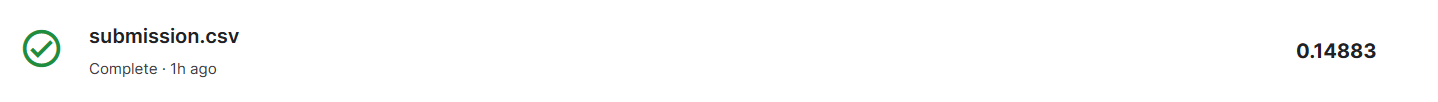

In [86]:
#使用Adaboost方法 
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor  
from sklearn.metrics import mean_squared_error  
  
# 定义随机森林回归器作为弱学习器  
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)   
# 定义AdaBoost集成回归器  
ada_reg = AdaBoostRegressor(base_estimator=rf_reg, n_estimators=100, random_state=42)   
# 训练AdaBoost集成回归器  
ada_reg.fit(X_train_cleaned, y_train)    
# 使用训练好的模型进行预测  
y_pred_train = ada_reg.predict(X_train_cleaned)  
y_pred_test = ada_reg.predict(X_test_cleaned)    
# 输出训练集和测试集的均方根误差（RMSE）  
print('Train RMSE:', mean_squared_error(y_train, y_pred_train, squared=False))  
print('Test RMSE:', mean_squared_error(y_test, y_pred_test, squared=False))

d:\Anaconda\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Train RMSE: 7462.070855411868
Test RMSE: 26075.96086292444


# 结果
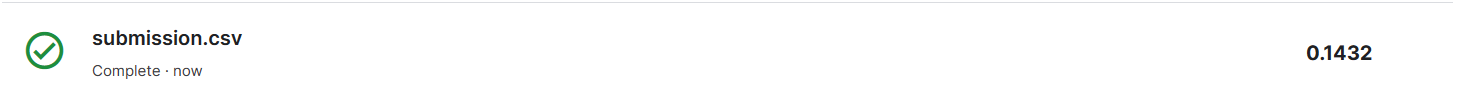

In [96]:
#使用baggingregressor对上面的基础模型进行集成学习
from sklearn.ensemble import BaggingRegressor
base_models = (
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),  
    ('sgd', SGDRegressor(loss="squared_error", fit_intercept=True, learning_rate='invscaling', eta0=0.01)),  
    ('ada',AdaBoostRegressor(base_estimator=rf_reg, n_estimators=100, random_state=42)) ) 

bagging_model = BaggingRegressor(estimator=base_models,random_state=42)  
bagging_model.fit(X_train, y_train)  
y_pred_bagging = bagging_model.predict(X_test)  
print('Bagging Regression RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_bagging)))


InvalidParameterError: The 'estimator' parameter of BaggingRegressor must be an object implementing 'fit' and 'predict' or None. Got (('rf', RandomForestRegressor(random_state=42)), ('sgd', SGDRegressor()), ('ada', AdaBoostRegressor(base_estimator=RandomForestRegressor(n_estimators=10,
                                                       random_state=42),
                  n_estimators=100, random_state=42))) instead.

In [92]:
BaggingRegressor?

Init signature:
BaggingRegressor(
    estimator=None,
    n_estimators=10,
    *,
    max_samples=1.0,
    max_features=1.0,
    bootstrap=True,
    bootstrap_features=False,
    oob_score=False,
    warm_start=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    base_estimator='deprecated',
)
Docstring:     
A Bagging regressor.

A Bagging regressor is an ensemble meta-estimator that fits base
regressors each on random subsets of the original dataset and then
aggregate their individual predictions (either by voting or by averaging)
to form a final prediction. Such a meta-estimator can typically be used as
a way to reduce the variance of a black-box estimator (e.g., a decision
tree), by introducing randomization into its construction procedure and
then making an ensemble out of it.

This algorithm encompasses several works from the literature. When random
subsets of the dataset are drawn as random subsets of the samples, then
this algorithm is known as Pasting [1]_. If sam

# 预测房价

In [ ]:
test_features = [feature for feature in features if feature != 'SalePrice']
X_test_df = test_set[test_features]
X_test_categorical = enc.transform(X_test_df[cat_features]).toarray()
X_test_categorical_df = pd.DataFrame(X_test_categorical, columns = enc.get_feature_names_out())
X_test_normalized = scaler.transform(X_test_df[num_fetures])
X_test_normalized_df = pd.DataFrame(X_test_normalized, columns=scaler.get_feature_names_out())
X_test_cleaned = pd.concat([X_test_categorical_df, X_test_normalized_df], axis='columns')
X_test_cleaned

,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,BsmtQual_Ex,BsmtQual_Fa,...,BsmtFullBath,BsmtUnfSF,BedroomAbvGr,KitchenAbvGr,EnclosedPorch,ScreenPorch,PoolArea,MSSubClass,OverallCond,MoSold
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.813995,-0.671958,-1.112669,-0.207743,-0.344584,1.831848,-0.073333,-0.871228,0.390453,-0.134958
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.813995,-0.366108,0.128036,-0.207743,-0.344584,-0.280154,-0.073333,-0.871228,0.390453,-0.134958
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.813995,-0.971062,0.128036,-0.207743,-0.344584,-0.280154,-0.073333,0.067628,-0.515364,-1.254499
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.813995,-0.550518,0.128036,-0.207743,-0.344584,-0.280154,-0.073333,0.067628,0.390453,-0.134958
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.813995,1.007968,-1.112669,-0.207743,-0.344584,2.254248,-0.073333,1.475911,-0.515364,-2.000860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.813995,-0.051263,0.128036,-0.207743,-0.344584,-0.280154,-0.073333,2.414766,1.296270,-0.134958
1455,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.813995,-0.617985,0.128036,-0.207743,-0.344584,-0.280154,-0.073333,2.414766,-0.515364,-0.881319
1456,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.119464,-1.279161,1.368742,-0.207743,-0.344584,-0.280154,-0.073333,-0.871228,1.296270,0.984583
1457,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.813995,0.013955,0.128036,-0.207743,-0.344584,-0.280154,-0.073333,0.654412,-0.515364,0.238222


In [ ]:
#处理缺失值
X_test_cleaned.isnull().sum().sum()
X_test_cleaned[X_test_cleaned['TotalBsmtSF'].isnull()]
X_test_cleaned[X_test_cleaned['GarageArea'].isnull()]
X_test_cleaned[X_test_cleaned['GarageCars'].isnull()]
X_test_cleaned = X_test_cleaned.fillna(0)

In [ ]:
y_pred_lr = ada_reg.predict(X_test_cleaned)

In [ ]:
final_df = pd.DataFrame()
final_df['Id'] = test_set['Id'].values
final_df['SalePrice'] = y_pred_lr
final_df.head(5)

,Id,SalePrice
0,1461,125350.65
1,1462,155801.00
2,1463,181630.46
3,1464,185323.33
4,1465,204170.20


In [ ]:
#写入提交文件
final_df.to_csv('anotherdataset/submission.csv', index=False)


# 提交结果
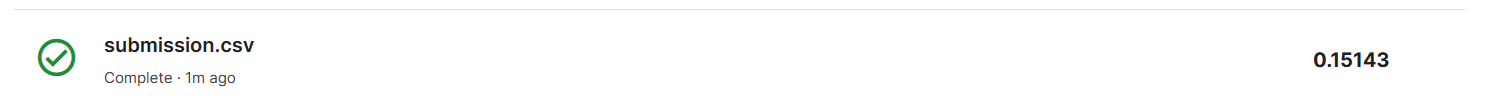